## PSF Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pytz
import pickle
import cmocean
%matplotlib inline

In [2]:
data=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataPSFPhys.pkl','rb'))

In [3]:
def rotmap(lon,lat,lon0,lat0,phi):
    # rotate around point (pick one near center of domain)
    # phi in degrees
    # first scale lats to match and center around lat0,lon0:
    lon1=(lon-lon0)*np.cos(lat0*np.pi/180)
    lat1=lat-lat0
    # now rotate:
    lon2=lon1*np.cos(phi*np.pi/180)-lat1*np.sin(phi*np.pi/180)
    lat2=lon1*np.sin(phi*np.pi/180)+lat1*np.cos(phi*np.pi/180)
    return lon2,lat2

In [4]:
cm1=cmocean.cm.thermal
#plt.get_cmap('PuBuGn')
#cm1=cmo.cm.matter
theta=-30
lon0=-123.9
lat0=49.3
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])
blon,blat=rotmap(bathylon,bathylat,lon0,lat0,theta)

In [5]:
data['N']=data['NO23']

In [6]:
data.keys()

Index(['Lat', 'Lon', 'NO23', 'PO4', 'Si', 'Station', 'Z', 'dtUTC', 'Chl',
       'Depth_m', 'Phaeo', 'SA', 'CT', 'pLat', 'pLon', 'tdiffH', 'AbsSal',
       'ConsT', 'j', 'i', 'mod_nitrate', 'mod_silicon', 'mod_ammonium',
       'mod_diatoms', 'mod_ciliates', 'mod_flagellates', 'mod_vosaline',
       'mod_votemper', 'N'],
      dtype='object')

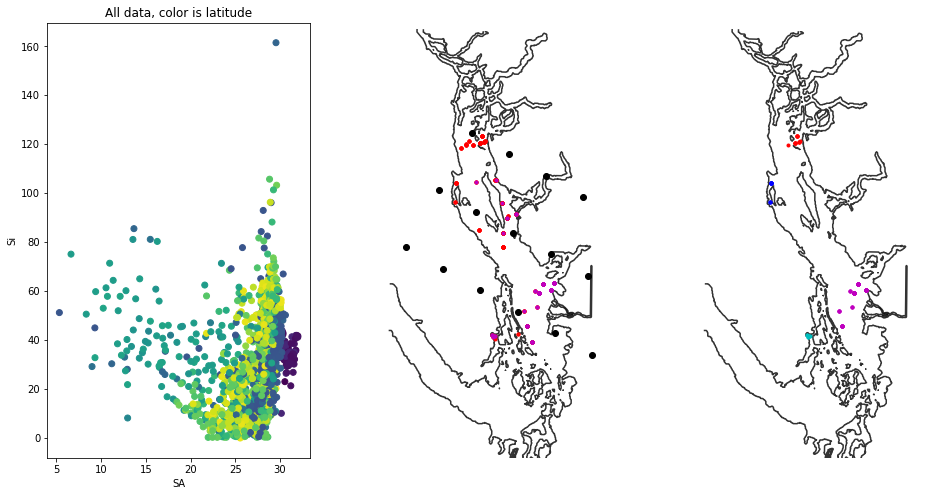

In [7]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
ax[0].scatter(data['SA'].values,data['Si'].values,c=data['Lat'])
ax[0].set_xlabel('SA')
ax[0].set_ylabel('Si')
ax[0].set_title('All data, color is latitude')

l1lo=np.arange(-125,-123,.5)
l1la=50*np.ones(np.shape(l1lo))
l1lox,l1lax=rotmap(l1lo[:],l1la[:],lon0,lat0,theta)

l2lo=np.arange(-125,-122,.5)
l2la=49*np.ones(np.shape(l2lo))
l2lox,l2lax=rotmap(l2lo[:],l2la[:],lon0,lat0,theta)


l3lo=np.arange(-125,-122,.5)
l3la=49.5*np.ones(np.shape(l3lo))
l3lox,l3lax=rotmap(l3lo[:],l3la[:],lon0,lat0,theta)

axLi=ax[1]
axLi.set_aspect(1, adjustable='box')
contour_lines = axLi.contour(blon,blat,bathyZ,[0],
            colors='black',zorder=2,linewidth=.5,alpha=.8)
axLi.plot(l1lox,l1lax,'ko')
axLi.plot(l2lox,l2lax,'ko')
axLi.plot(l3lox,l3lax,'ko')
axLi.set_xlim(-1.02,0.81)
axLi.set_ylim(-1.5,1.8)
axLi.axis('off')
dfS25=data.loc[data.SA<25]
lons,lats=rotmap(dfS25['Lon'], dfS25['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'r.')
dfS20=data.loc[data.SA<20]
lons,lats=rotmap(dfS20['Lon'], dfS20['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'m.')

axLi=ax[2]
axLi.set_aspect(1, adjustable='box')
contour_lines = axLi.contour(blon,blat,bathyZ,[0],
            colors='black',zorder=2,linewidth=.5,alpha=.8)
axLi.set_xlim(-1.02,0.81)
axLi.set_ylim(-1.5,1.8)
axLi.axis('off')
dfG1=data.loc[(data.Lat<50.3)&(data.Lat>49.8)&(data.SA<23)]
lons,lats=rotmap(dfG1['Lon'], dfG1['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'r.')

dfG2=data.loc[(data.Lat<49.65)&(data.Lat>49.3)&(data.Lon<-124.65)&(data.Lon>-125)&(data.SA<25)]
lons,lats=rotmap(dfG2['Lon'], dfG2['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'b.')

dfG3=data.loc[(data.Lat<48.9)&(data.Lat>48.5)&(data.Lon<-123.4)&(data.Lon>-123.8)&(data.SA<24)]
lons,lats=rotmap(dfG3['Lon'], dfG3['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'c.')


dfG4=data.loc[(data.Lat<49.3)&(data.Lat>48.9)&(data.Lon<-123.0)&(data.Lon>-123.5)&(data.SA<25)]
lons,lats=rotmap(dfG4['Lon'], dfG4['Lat'],lon0,lat0,theta)
axLi.plot(lons,lats,'m.')

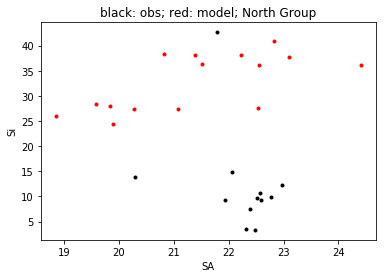

In [8]:
# Group 1 
plt.plot(dfG1['SA'],dfG1['Si'],'k.')
plt.plot(dfG1['mod_vosaline'],dfG1['mod_silicon'],'r.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('black: obs; red: model; North Group')

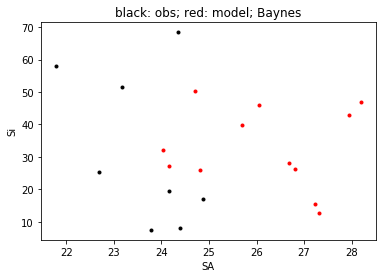

In [9]:
# Group 2 
plt.plot(dfG2['SA'],dfG2['Si'],'k.')
plt.plot(dfG2['mod_vosaline'],dfG2['mod_silicon'],'r.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('black: obs; red: model; Baynes')

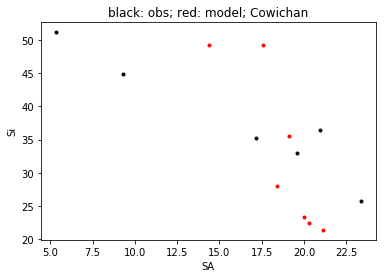

In [10]:
# Group 3 
plt.plot(dfG3['SA'],dfG3['Si'],'k.')
plt.plot(dfG3['mod_vosaline'],dfG3['mod_silicon'],'r.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('black: obs; red: model; Cowichan')

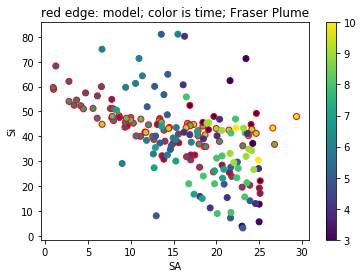

In [11]:
# Group 4 
plt.scatter(dfG4['mod_vosaline'],dfG4['mod_silicon'],c=dfG4['dtUTC'].dt.month,edgecolor='r')
plt.scatter(dfG4['SA'],dfG4['Si'],c=dfG4['dtUTC'].dt.month)
plt.colorbar()
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('red edge: model; color is time; Fraser Plume')

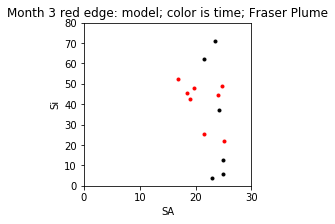

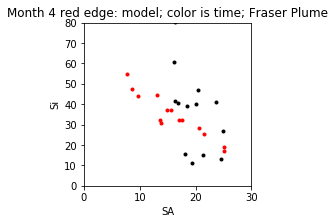

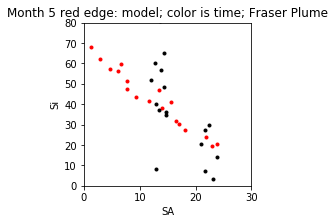

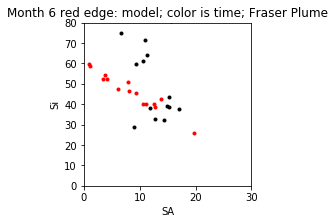

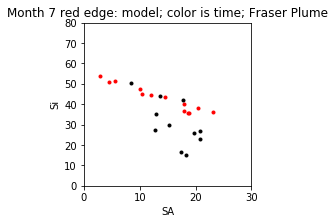

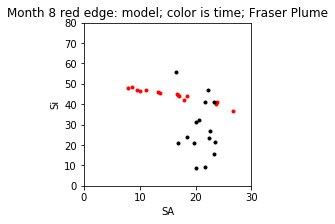

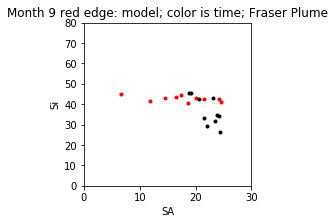

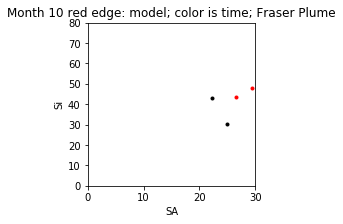

In [27]:
# Group 4 
for month in range(3,11):
    ii=dfG4['dtUTC'].dt.month==month
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.plot(dfG4.loc[ii,['mod_vosaline']].values,dfG4.loc[ii,['mod_silicon']].values,'r.')
    ax.plot(dfG4.loc[ii,['SA']].values,dfG4.loc[ii,['Si']].values,'k.')
    ax.set_xlabel('SA')
    ax.set_ylabel('Si')
    ax.set_xlim(0,30)
    ax.set_ylim(0,80)
    ax.set_title('Month '+str(month)+' red edge: model; color is time; Fraser Plume')

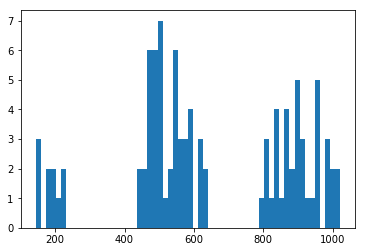

In [12]:
plt.hist([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']],60);

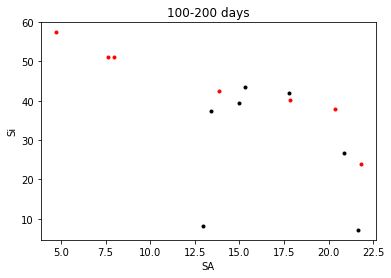

In [13]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>100)&(xd<200)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('100-200 days')

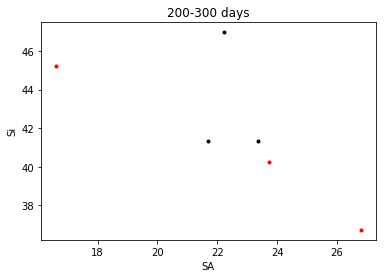

In [14]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>200)&(xd<300)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('200-300 days')

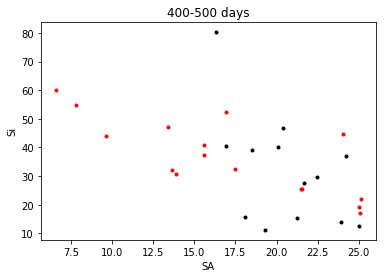

In [15]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>400)&(xd<500)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('400-500 days')

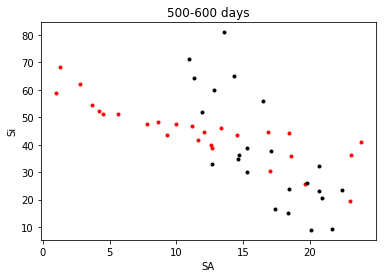

In [16]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>500)&(xd<600)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('500-600 days')

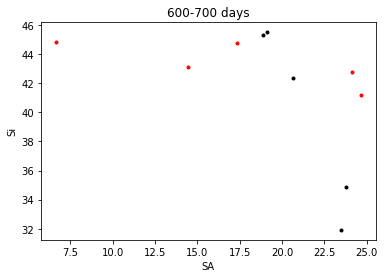

In [17]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>600)&(xd<700)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('600-700 days')

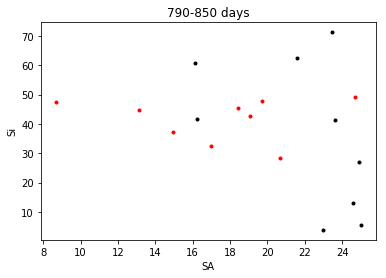

In [18]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>790)&(xd<850)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('790-850 days')

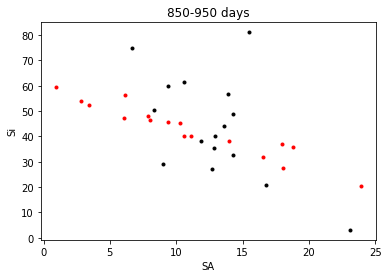

In [19]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>850)&(xd<950)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('850-950 days')

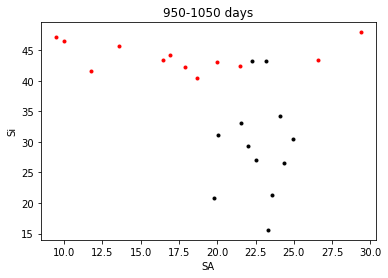

In [20]:
xd=np.array([(xx-dt.datetime(2015,1,1)).days for xx in dfG4['dtUTC']])
dfA=dfG4.loc[(xd>950)&(xd<1050)]
plt.plot(dfA['mod_vosaline'],dfA['mod_silicon'],'r.')
plt.plot(dfA['SA'],dfA['Si'],'k.')
plt.xlabel('SA')
plt.ylabel('Si')
plt.title('950-1050 days')

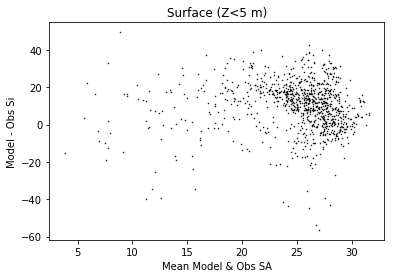

In [22]:
dd=data.loc[data.Z<5]
plt.plot(0.5*(dd['SA'].values+dd['mod_vosaline'].values),dd['mod_silicon'].values-dd['Si'].values,'k.',ms=1)
plt.xlabel('Mean Model & Obs SA')
plt.ylabel('Model - Obs Si')
plt.title('Surface (Z<5 m)')